# Visualizing Earnings Based On College Majors

### About:
Analy dataset on the job outcomes of students who graduated from college between 2010 and 2012. 

### Goal:
1. Explore how using the pandas plotting functionality along with the Jupyter notebook interface to explore data quickly using visualizations
2. Analyse data set and explore questions from the dataset like:

 - Do students in more popular majors make more money?
 - How many majors are predominantly male?Predominantly female?
 - Which category of majors have the most students?


#### Dataset fields description:
 - Rank - Rank by median earnings (the dataset is ordered by this column).
 - Major_code - Major code.
 - Major - Major description.
 - Major_category - Category of major.
 - Total - Total number of people with major.
 - Sample_size - Sample size (unweighted) of full-time.
 - Men - Male graduates.
 - Women - Female graduates.
 - ShareWomen - Women as share of total.
 - Employed - Number employed.
 - Median - Median salary of full-time, year-round workers.
 - Low_wage_jobs - Number in low-wage service jobs.
 - Full_time - Number employed 35 hours or more.
 - Part_time - Number employed less than 35 hours.

Dataset link: https://github.com/fivethirtyeight/data/tree/master/college-majors

In [103]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from collections import OrderedDict
%matplotlib inline

In [2]:
# read dataset from file
recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
recent_grads.iloc[0,:]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

#### Remove rows with missing values

In [8]:
# remove n/a fields
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna(axis=0)
cleaned_data_count = recent_grads.shape[0]

In [9]:
print("Old rows count:{}, new rows count: {}".format(raw_data_count, cleaned_data_count))

Old rows count:173, new rows count: 172


There was only one n/a row in the dataset

### Scatter Plots

#### Examine following relations between:
 - Sample_size and Median

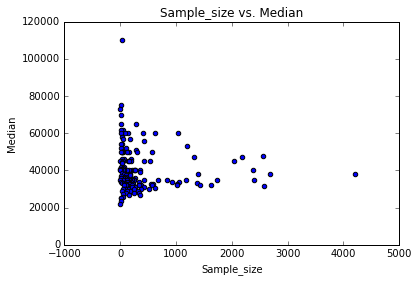

In [27]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('{} vs. {}'.format('Sample_size','Median'))
plt.show()

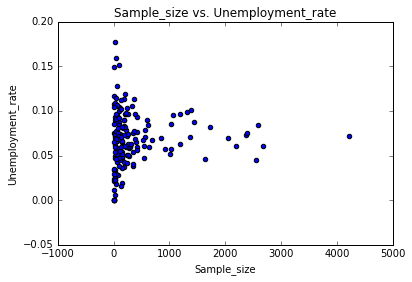

In [28]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('{} vs. {}'.format('Sample_size','Unemployment_rate'))
plt.show()

 - Sample_size and Unemployment_rate

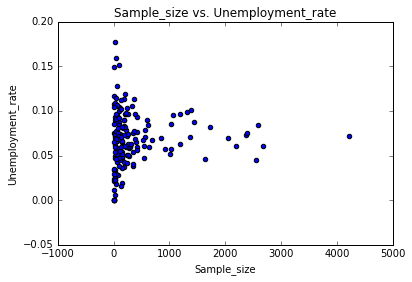

In [29]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('{} vs. {}'.format('Sample_size','Unemployment_rate'))
plt.show()

- Full_time and Median

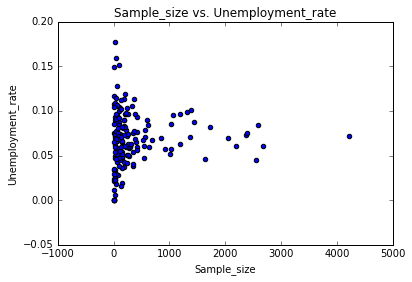

In [30]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('{} vs. {}'.format('Sample_size','Unemployment_rate'))
plt.show()

- ShareWomen and Unemployment_rate

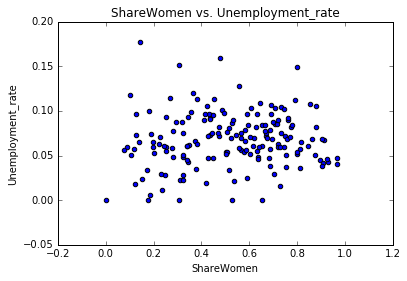

In [31]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('{} vs. {}'.format('ShareWomen','Unemployment_rate'))
plt.show()

- Men and Median

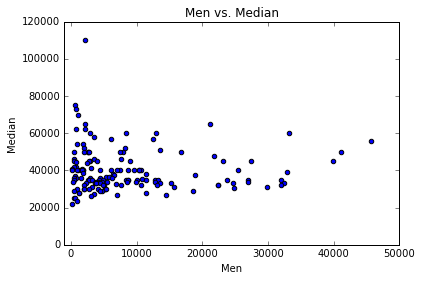

In [34]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_xlim(-1000, 50000)
ax.set_title('{} vs. {}'.format('Men','Median'))
plt.show()

- Women and Median

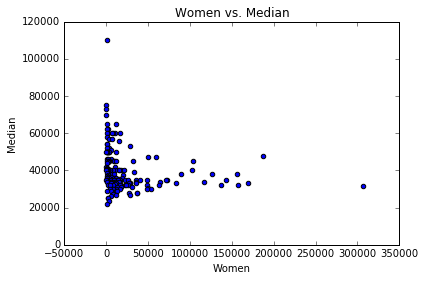

In [33]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('{} vs. {}'.format('Women','Median'))
plt.show()

- ShareWomen and Median

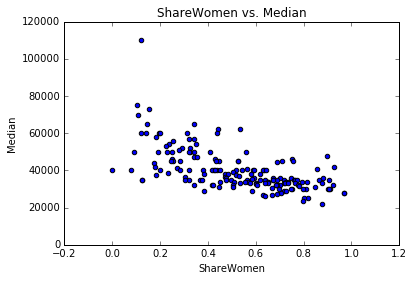

In [35]:
ax = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')
ax.set_title('{} vs. {}'.format('ShareWomen','Median'))
plt.show()

- Full_time and Median

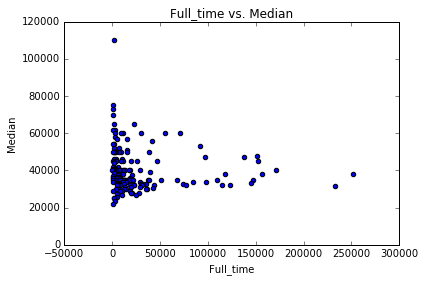

In [37]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('{} vs. {}'.format('Full_time','Median'))
plt.show()

#### Main examinations:
 - Most money (as well as the least) is made by students in less-popular majors
 - There is no relation between the unemployment rate and women share by major
 - Students that majored in subjects that were majority female make less money
 - There is no link between the number of full-time employees and median salary

### Histograms

#### Explore the distributions of the following columns:

 - Sample_size

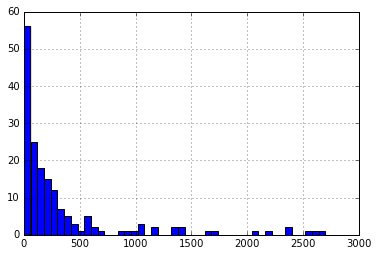

In [84]:
recent_grads['Sample_size'].hist(bins=50, range=(0,3000))

 - Median

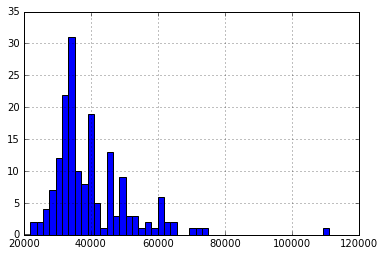

In [75]:
recent_grads['Median'].hist(bins=50, range=(20000,115000))

 - Employed

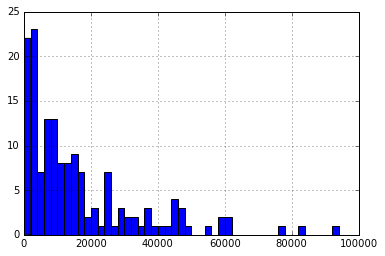

In [69]:
recent_grads['Employed'].hist(bins=50, range=(0,100000))

 - Full_time

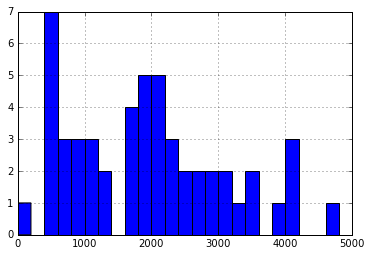

In [42]:
recent_grads['Full_time'].hist(bins=25, range=(0,5000))

 - ShareWomen

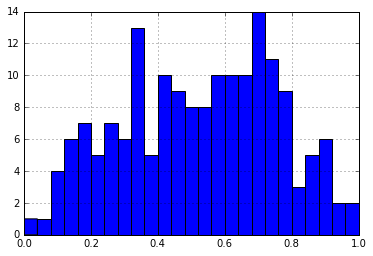

In [66]:
recent_grads['ShareWomen'].hist(bins=25, range=(0,1))

 - Unemployment_rate

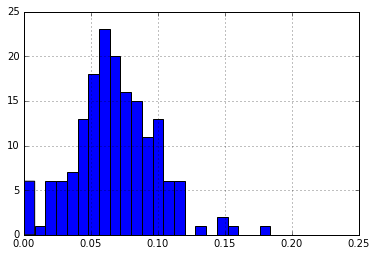

In [67]:
recent_grads['Unemployment_rate'].hist(bins=25, range=(0,0.2))

 - Men

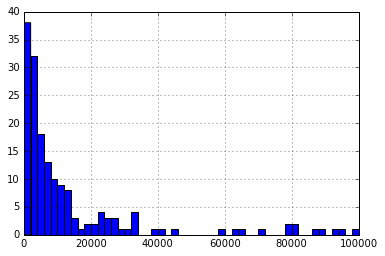

In [53]:
recent_grads['Men'].hist(bins=50, range=(0,100000))

 - Women

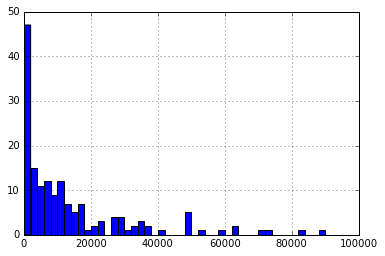

In [57]:
recent_grads['Women'].hist(bins=50, range=(0,100000))

#### Main examinations:
 - Most common median salary is 33k
 - 82% of majors have unemployment rate less than 0.1
 - 3% of majors are predominantly male (less than 10% women)
 - 6% of majors are predominantly female (less than 10% men)

### Scatter matrix

#### Explore the distributions of the following columns:

 - Sample_size and Median

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba388f58d0>,
      dtype=object)

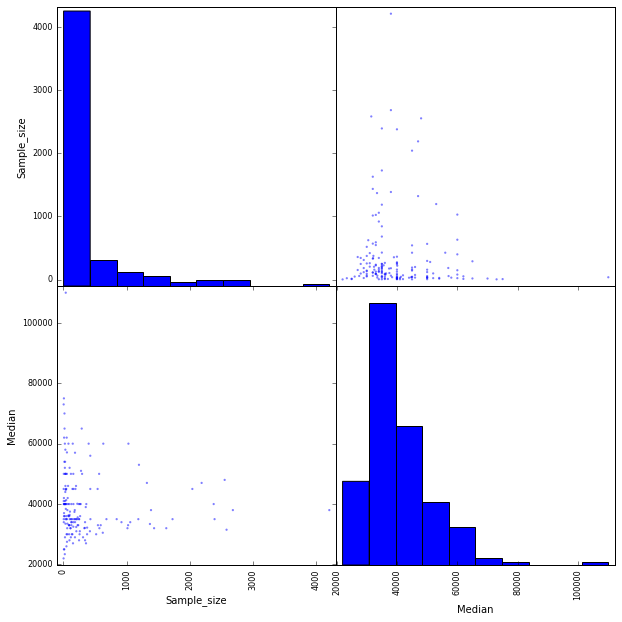

In [88]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

 - Sample_size, Median, and Unemployment_rate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba3879c048>,
      dtype=object)

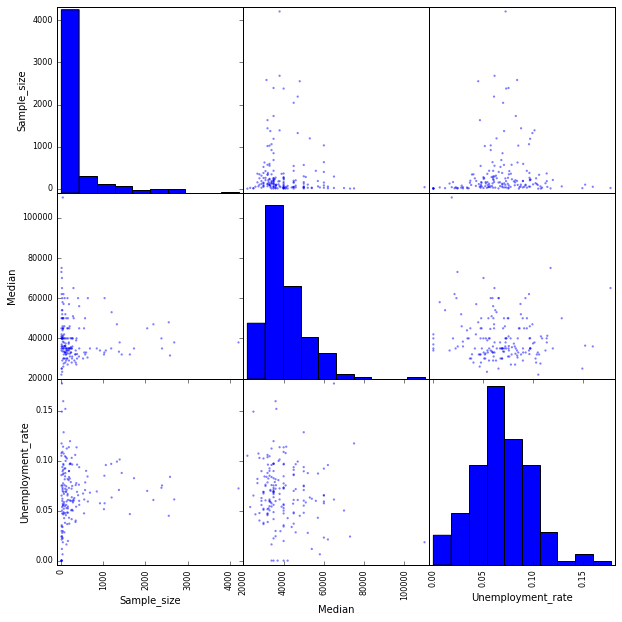

In [89]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(10,10))

#### Main examinations:
 - Higher unemployment rate is typical for majors with lower median salary
 - Students on popular majors hake less money

### Bars

Compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe

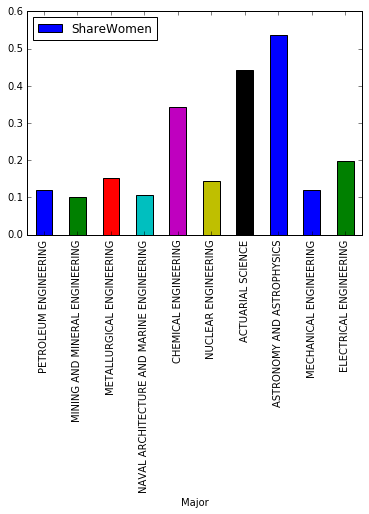

In [90]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')

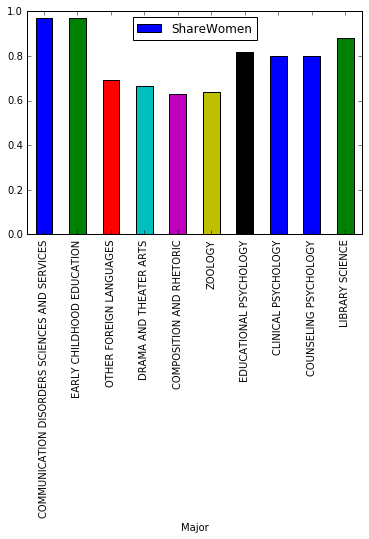

In [91]:
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

#### Main examinations:
 - Top ranked majors have low percentage of women students (average is 22%)
 - Bottom ranked majors have hidgh percentage of women students (average is 78%)

Compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows of the dataframe

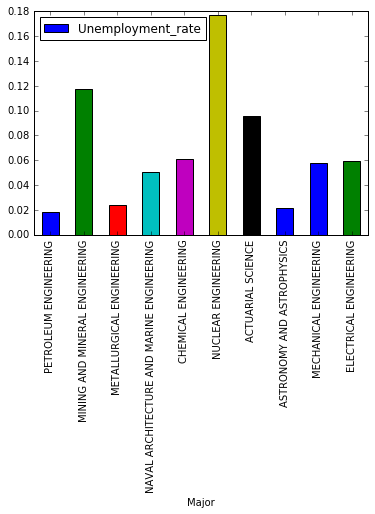

In [93]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')

In [98]:
recent_grads[:10]['Unemployment_rate'].sum() / 10 * 100

6.815034360000001

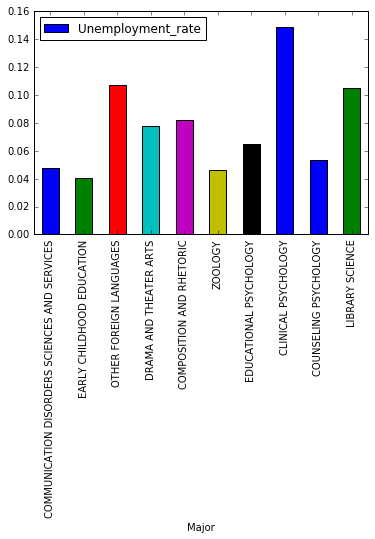

In [94]:
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

In [99]:
recent_grads[-10:]['Unemployment_rate'].sum() / 10 * 100

7.73135073

#### Main examinations:
 - Top ranked majors have sligtly lower unemployment rate (average is 6.81%) than bottom ranked majors (average is 7.73%)

### Compare the number of women in each category of majors.

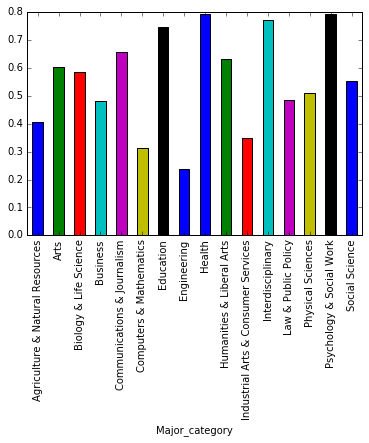

In [125]:
share_women_by_cat= recent_grads.groupby('Major_category')['ShareWomen'].mean()
share_women_by_cat.plot.bar()

### Main examinations:
 - Less popular majors among women are Engineering, Computers & Mathematics and Industries & Liberal Arts.
 - Most popular majors among women are Health, Psychology & Social Work and Education